  2.002180 seconds (42 allocations: 426.948 MiB)


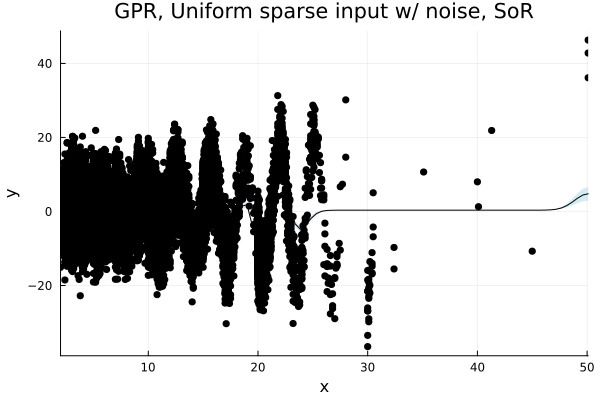

In [76]:
using DataFrames, RDatasets, Random, SpecialFunctions, Distributions, Ranges, GaussianProcesses

df = dataset("ggplot2", "diamonds")
a=df.Carat

function fstar(x::Float64)
 return abs(x-5)*(cos(2x))
 end   
m=rand(a/3,500)  #randomly selected sparse vector input
u=(a[1:108:end]) #uniformly selected sparse vector input
u=abs.((u.-maximum(u))/(maximum(u)-minimum(u))) #normalising the sparse vector
σy = 5.0        #sd of observation noise
n=500           # number of data points in sparse vector
Random.seed!(1) # for reproducibility
Xdistr =a       #sampling x points from Carat in diamond data set
ydistr = Normal(0,σy) #distribution of noise
x = (rand(Xdistr, length(a))*10) #randomly sampling elements from X
X = Matrix(x')                   #building the matrix
Yn= fstar.(x)                    #output vector without noise
Y= (fstar.(x) .+rand(ydistr,length(a))) #with noise
k = SE(0.2,0.0)                         #defining kernel as squared exponential operator
Xu = Matrix(quantile(x,u)')             #The X matrix with quantile cut at 95% CI
Xr=Matrix(quantile(x,m)')
# Subset of Regressors, uniformly spread sparse dataset, with noise
@time gp_SOR = GaussianProcesses.SoR(X, Xu, Y, MeanConst(mean(Y)), k, log(σy));
using Plots
plot(gp_SOR; xlabel="x", ylabel="y", title="GPR, Uniform sparse input w/ noise, SoR", legend=false, fmt=:png)


  1.740811 seconds (42 allocations: 426.948 MiB)


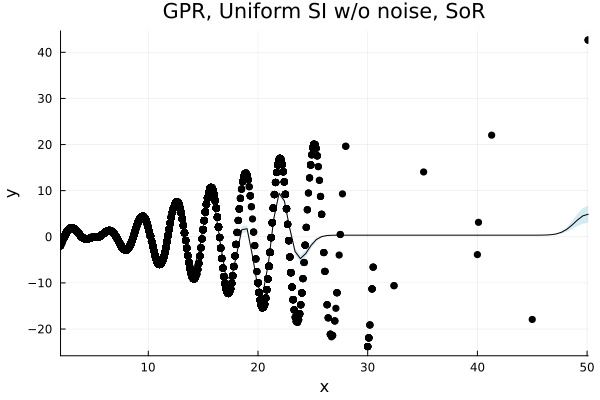

In [77]:
#SoR without noise
@time gp_SOR = GaussianProcesses.SoR(X, Xu, Yn, MeanConst(mean(Yn)), k, log(σy));
using Plots
plot(gp_SOR; xlabel="x", ylabel="y", title="GPR, Uniform SI w/o noise, SoR", legend=false, fmt=:png)


  1.501781 seconds (42 allocations: 426.948 MiB)


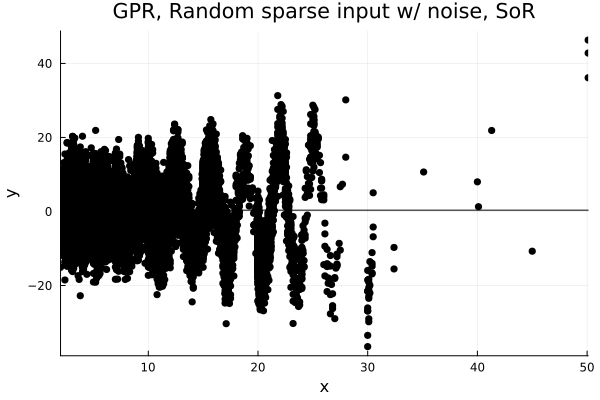

In [78]:
Xu = Matrix(quantile(x,m)')             #The X matrix with quantile cut at 95% CI
@time gp_SOR = GaussianProcesses.SoR(X, Xu, Y, MeanConst(mean(Y)), k, log(σy));
using Plots
plot(gp_SOR; xlabel="x", ylabel="y", title="GPR, Random sparse input w/ noise, SoR", legend=false, fmt=:png)


  1.810416 seconds (42 allocations: 426.948 MiB)


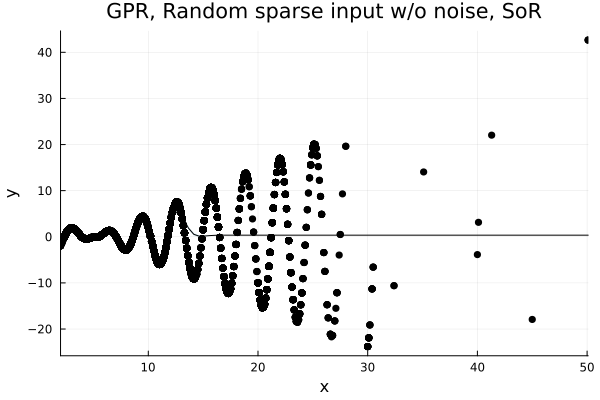

In [79]:
Tu = Xr             #The X matrix with quantile cut at 95% CI
@time gp_SOR = GaussianProcesses.SoR(X, Tu, Yn, MeanConst(mean(Yn)), k, log(σy));
using Plots
plot(gp_SOR; xlabel="x", ylabel="y", title="GPR, Random sparse input w/o noise, SoR", legend=false, fmt=:png)


  1.709012 seconds (42 allocations: 426.948 MiB)


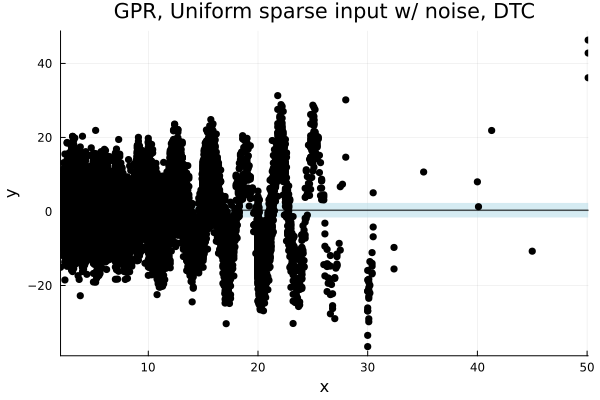

In [80]:
# Deterministic Training Conditional with noise
Tu=Xu
@time gp_DTC = GaussianProcesses.DTC(X, Tu, Y, MeanConst(mean(Y)), k, log(σy));
plot(gp_DTC; xlabel="x", ylabel="y", title="GPR, Uniform sparse input w/ noise, DTC", legend=false, fmt=:png)




  1.857480 seconds (42 allocations: 426.948 MiB)


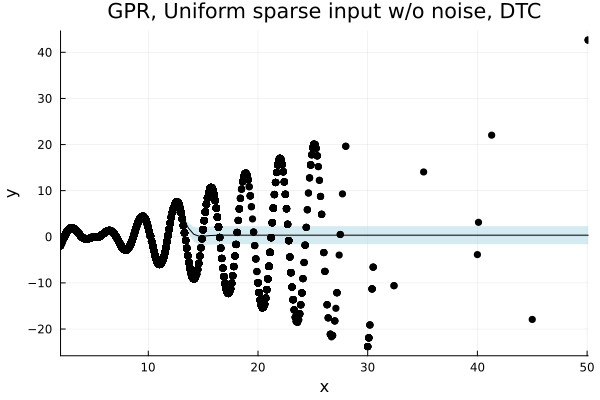

In [81]:
Tu=Xu
@time gp_DTC = GaussianProcesses.DTC(X, Tu, Yn, MeanConst(mean(Y)), k, log(σy));
plot(gp_DTC; xlabel="x", ylabel="y", title="GPR, Uniform sparse input w/o noise, DTC", legend=false, fmt=:png)


  1.723924 seconds (42 allocations: 426.948 MiB)


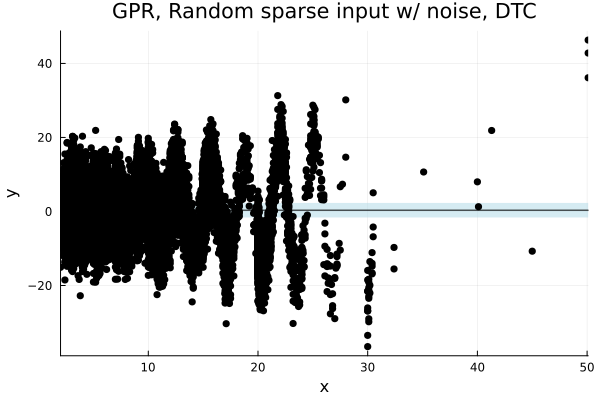

In [82]:
Tu=Xr
@time gp_DTC = GaussianProcesses.DTC(X, Tu, Y, MeanConst(mean(Y)), k, log(σy));
plot(gp_DTC; xlabel="x", ylabel="y", title="GPR, Random sparse input w/ noise, DTC", legend=false, fmt=:png)


  1.642595 seconds (42 allocations: 426.948 MiB)


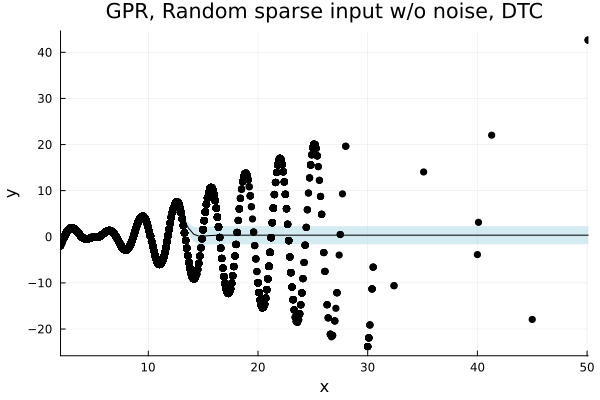

In [83]:
#DPR with DTC (no noise)
@time gp_DTC = GaussianProcesses.DTC(X, Xu, Yn, MeanConst(mean(Yn)), k, log(σy));
plot(gp_DTC; xlabel="x", ylabel="y", title="GPR, Random sparse input w/o noise, DTC", legend=false, fmt=:png)


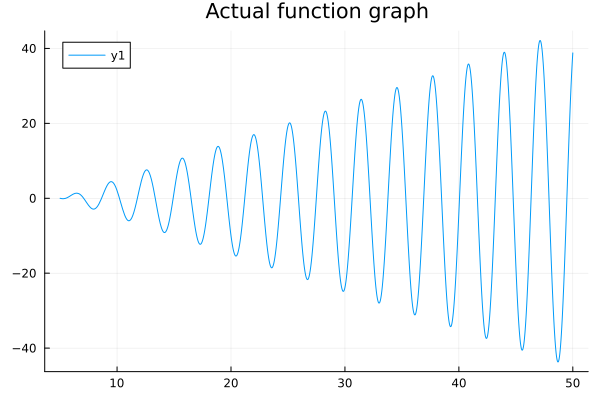

In [89]:
using Plots
plot(fstar, 5,50,title="Actual function graph")